# Titanic Survival Model
Would you survive the Titanic? Find out using this machine learning model.

## Setup & reading the dataset

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [90]:
data = pd.read_csv('./data/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here are the ages themselves, in relation to the class of the passenger.

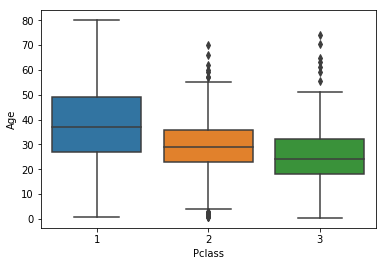

In [91]:
sns.boxplot(
    x='Pclass', y='Age',
    data=data
)

## Cleaning the data
This dataset is pretty messy right now, and there are a few things that we need to fix. First, lets get rid of unnecessary information that won't effect our model.

In [92]:

data.drop(
    'Cabin',
    axis=1,
    inplace=True
)
data.dropna(inplace=True)


There are also a lot of null values in this dataset, which our model will not be able to understand. We can see the null values in the dataset here:

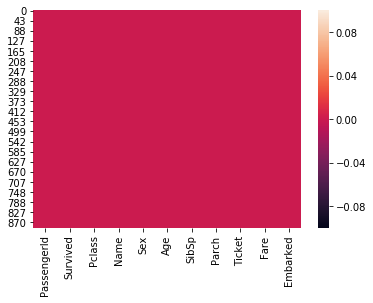

In [93]:
null_values = data.isnull()
sns.heatmap(null_values)

### Fixing the null values
First, lets write a function to fill all null-aged passengers with the average age of that passenger's class. However, before we do this, we must calcualte the mean ages for all different passenger classes.

In [94]:
age_means = data.groupby('Pclass')['Age'].mean()
print(age_means)

Pclass
1    38.105543
2    29.877630
3    25.140620
Name: Age, dtype: float64


In [95]:
def fill_missing_age(passenger):
    age = passenger[0]
    p_class = passenger[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return age_means[1] # Average age in first class
        elif p_class == 2:
            return age_means[2] # Average age in "second class"
        else:
            return age_means[3] # Average age in "third class"
    else:
        return age

Reassign every single age in the dataset with the return of our new `fill_missing_age` function.

In [96]:
data['Age'] = data[['Age', 'Pclass']].apply(fill_missing_age, axis=1)

### Getting dummy values for gender and embarked attributes
The next line will make all `male` values `1` and all `female` values `0` from our dataset and store that information in a vector.

Then, the same thing will happen for the `Embarked` feature in the dataset.

In [97]:
gender = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)

Now we will add these new dummy values (that our model will be able to understand, for they are numerical) into our original dataset.

In [98]:
data.drop(
    [
        'Sex',
        'Embarked',
        'Name',
        'Ticket'
    ],
    axis=1, inplace=True
)

training_data = pd.concat(
    [
        training_data,
        gender,
        embark
    ],
    axis=1
)

In [99]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


### Analysis
Now we can evaluate how well we cleaned the sex and embark data by seeing that heatmap again

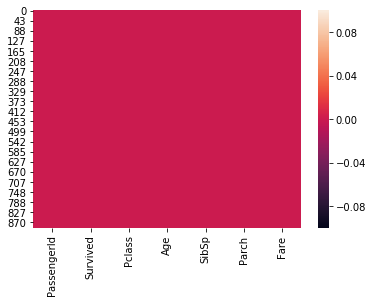

In [100]:
null_values = data.isnull()
sns.heatmap(null_values)

See? No null values in the sex feature anymore. That's good! Our data is now much cleaner.

## Visualization
Lets visualize some important data using seaborn.

In [101]:
sns.countplot(x='Survived', hue='male', data=data)

ValueError: Could not interpret input 'male'

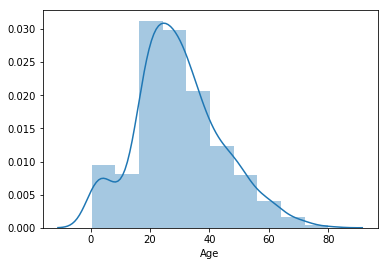

In [102]:
sns.distplot(
    data['Age'].dropna(),
    bins=10
)

## Training
Now it is time to train the dataset. However, we must first split the data appropriately.

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['Survived'],
    test_size=0.30,
    random_state=101
)

Now that the data has been split, we can train the model accordingly.

In [115]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

/opt/anaconda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now that the model has been trained, let's see how well it will predict our testing data.

[0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1]


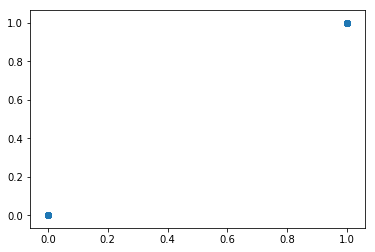

In [116]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
print(predictions)

## Analysis
Now we can assess the accuracy of our model using sklean's metrics library.

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       128
           1       0.72      0.51      0.60        86

   micro avg       0.72      0.72      0.72       214
   macro avg       0.72      0.69      0.69       214
weighted avg       0.72      0.72      0.71       214

